## Data Cleaning

In [6]:
import pandas as pd
import numpy as np
import ast

In [ ]:
# load dataset
df = pd.read_csv("Novelupdates_info.csv")
df2 = pd.read_csv("Novelupdates_info2.csv")
df3 = pd.read_csv("Novelupdates_info3.csv")
df4 = pd.read_csv("Novelupdates_info4.csv")

In [16]:
df.head()

,Title,Cover,Chapters,Update Frequency,Readers,Reviews,Last Updated,Genres,Origin,Rating,Description,Source
0,Don’t Call Me Your Wife (GL),NaN,95 Chapters,Every 0.9 Day(s),152 Readers,1 Reviews,06-15-2025,"['Action', 'Adventure', 'Fantasy', 'Romance', ...",NaN,NaN,A fiery and sharp character x a gentle and cun...,https://www.novelupdates.com/series/dont-call-...
1,I Became a Rare Species in the Immortal Cultiv...,NaN,28 Chapters,Every 0.7 Day(s),76 Readers,1 Reviews,06-15-2025,"['Action', 'Adventure', 'Martial Arts', 'Roman...",NaN,NaN,The Heavenly Dao bestowed blessings from the I...,https://www.novelupdates.com/series/i-became-a...
2,I Come From the Abyss to Save Humanity Today,NaN,86 Chapters,Every 3.3 Day(s),648 Readers,4 Reviews,06-15-2025,"['Action', 'Drama', 'Fantasy', 'Gender Bender'...",NaN,NaN,"The Abyss—represents pure annihilation, they p...",https://www.novelupdates.com/series/i-come-fro...
3,How to Survive as the Horror Game Villain’s Fa...,NaN,7 Chapters,Every 4.7 Day(s),156 Readers,0 Reviews,06-15-2025,"['Fantasy', 'Romance', 'Smut']",NaN,NaN,“I’ll ask again. Who are you?”,https://www.novelupdates.com/series/how-to-sur...
4,After Becoming the Aunt of the Dragon Hero,NaN,178 Chapters,Every 0.5 Day(s),575 Readers,0 Reviews,06-15-2025,"['Action', 'Comedy', 'Fantasy', 'Martial Arts'...",NaN,NaN,Ming He always believed she had entered a worl...,https://www.novelupdates.com/series/after-beco...


In [ ]:
# combine datasets and drop duplicates
data = pd.concat([df, df2, df3, df4])
data.drop_duplicates(subset=["Title", "Source"], inplace=True)

In [ ]:
# fill missing descriptions
data["Description"].fillna("There is no description for this", inplace=True)

In [30]:
# to clean html chapters
data["Description"] = data["Description"].apply(lambda x: re.sub(r"<.*?>", "", x).strip())

In [ ]:
# converting chapters and up freq to integers
data["Chapters"] = data["Chapters"].str.extract(r'(\d+)').astype(int)
data["Update Frequency"] = data["Update Frequency"].str.extract(r'(\d+)').astype(int)
data["Readers"] = data["Readers"].str.extract(r'(\d+)').astype(int)
data["Reviews"] = data["Reviews"].str.extract(r'(\d+)').astype(int)

In [7]:
# data.to_csv("cleaned.csv", index=False)
data = pd.read_csv("cleaned.csv")

In [66]:
# to convert the str into a list
def parse(x):
    # use literal_eval if it's list or covert into list [genre.strip() for genre in x.split(",")]
    pass

data["Genres"] = data["Genres"].apply(ast.literal_eval)

In [67]:
# change last updated from str to datetime
data["Last Updated"] = pd.to_datetime(data["Last Updated"], errors="coerce")

## EDA and Visualization

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from itertools import combinations

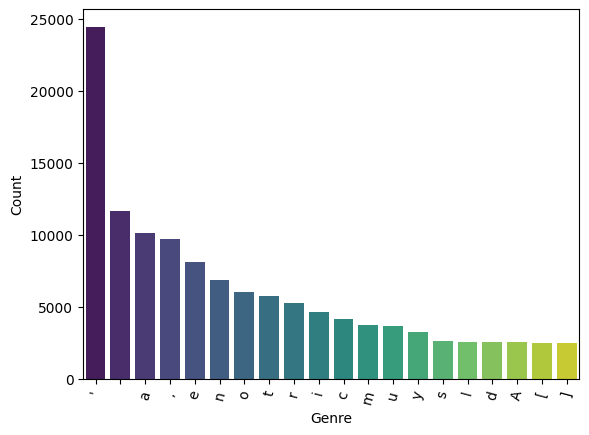

In [24]:
# counting frequency of each genre

all_genres = [x for sublist in data["Genres"] for x in sublist]
all_genres_count = Counter(all_genres)
sorted_genres = sorted(all_genres_count.items(), key=lambda x:x[1], reverse=True)

genre_df = pd.DataFrame(all_genres_count.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)
# plotting genres  
# Multi-lable bar chart where each genre is counted individually 
# we can see that fantasy is the most common genre acroos all novels
sns.barplot(x='Genre', y='Count', data=genre_df.head(20), hue='Genre', palette='viridis')
plt.xticks(rotation=75)
plt.show()

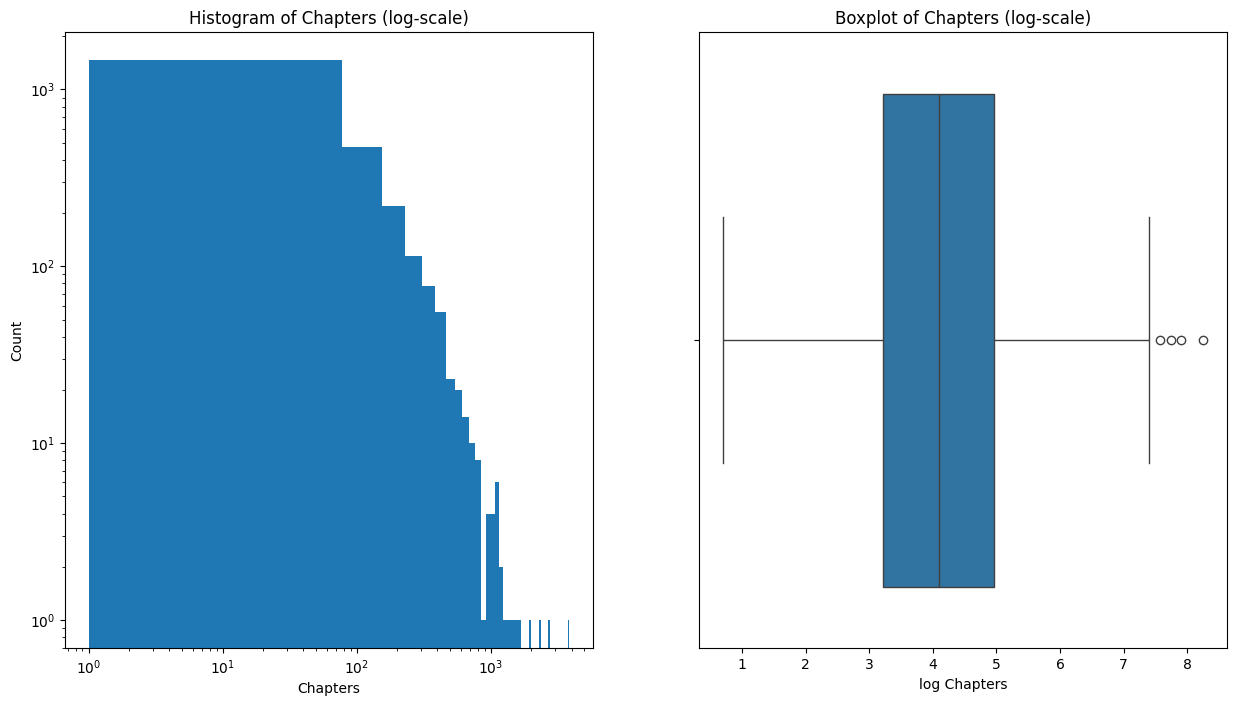

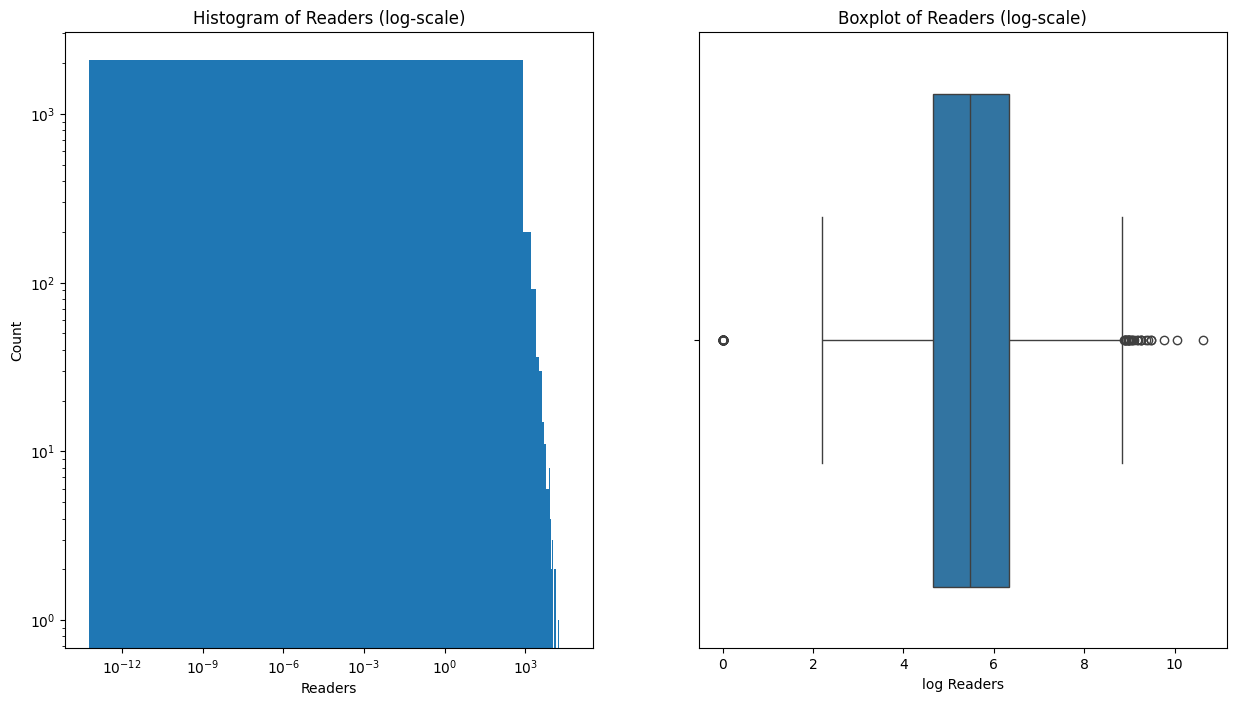

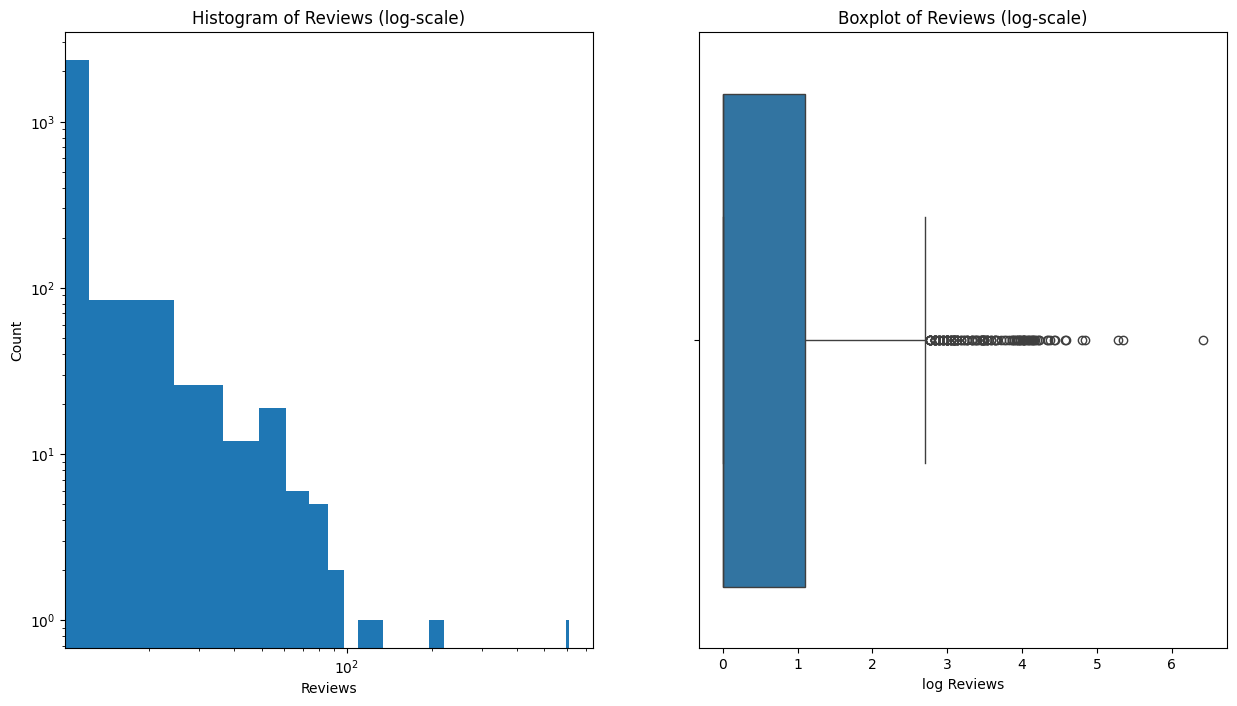

In [57]:
# chapters, readers and reviews distribution
cols = ["Chapters", "Readers", "Reviews"]

for col in cols: # we will apply log since the graph is highly skewed
    plt.figure(figsize=(15,8))
    # historgram
    plt.subplot(1,2,1)
    plt.hist(data[col], bins=50, log=True)
    plt.title(f'Histogram of {col} (log-scale)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xscale('log')

    # boxplots
    plt.subplot(1,2,2)
    sns.boxplot(x=np.log1p(data[col]))
    plt.xlabel(f'log {col}')
    plt.title(f"Boxplot of {col} (log-scale)")
    plt.show()

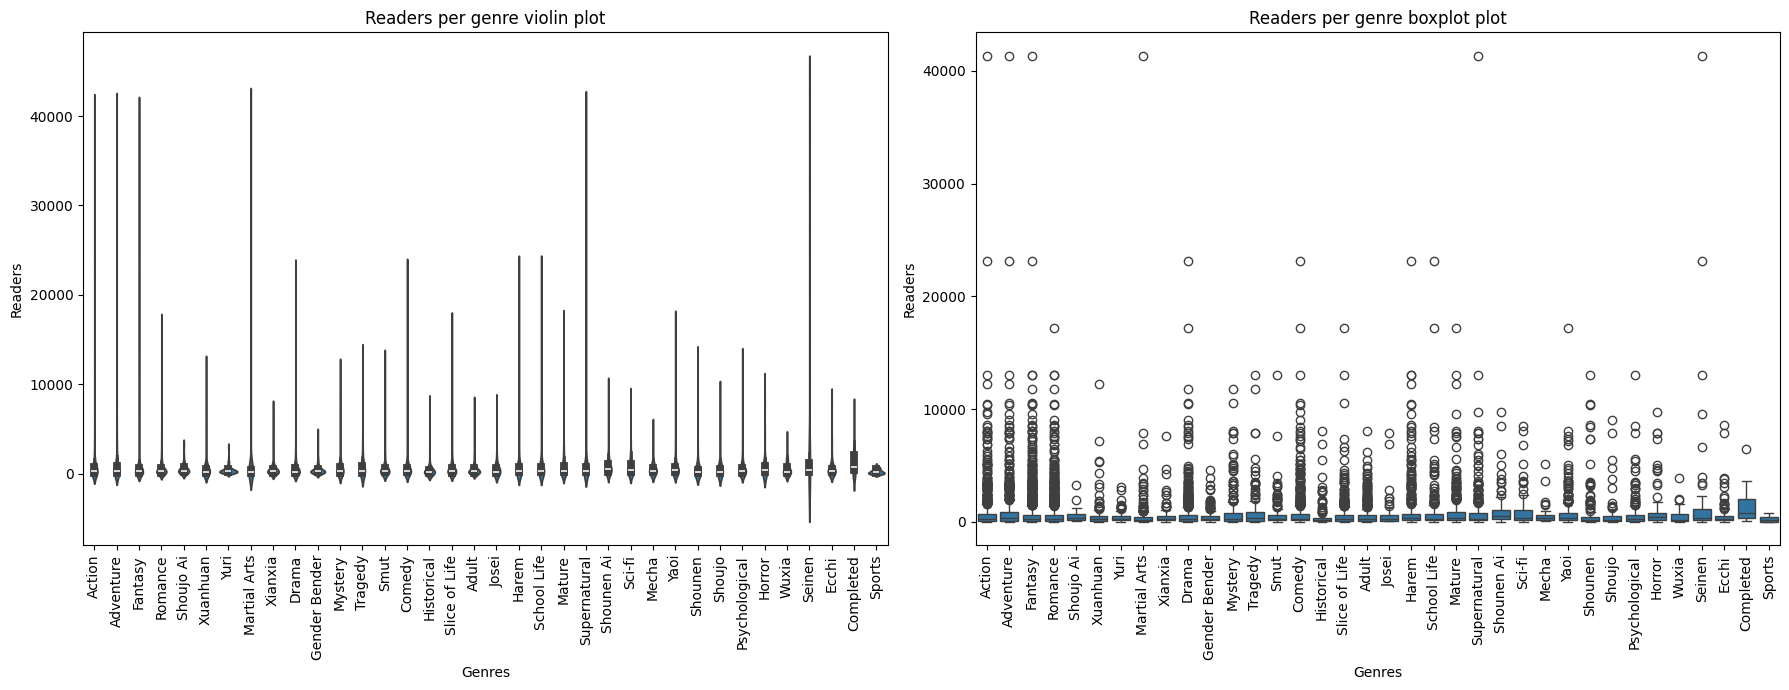

In [93]:
# data_explo = data.explode("Genres")

# readers per genre
fig, axe = plt.subplots(1, 2, figsize=(18,7))
# violin plt
sns.violinplot(x='Genres', y='Readers', data=data_explo, ax=axe[0])
axe[0].set_title("Readers per genre violin plot")
axe[0].tick_params(axis='x', rotation=90)

# boxplot
sns.boxplot(x="Genres", y='Readers', data=data_explo, ax=axe[1])
axe[1].set_title("Readers per genre boxplot plot")
axe[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

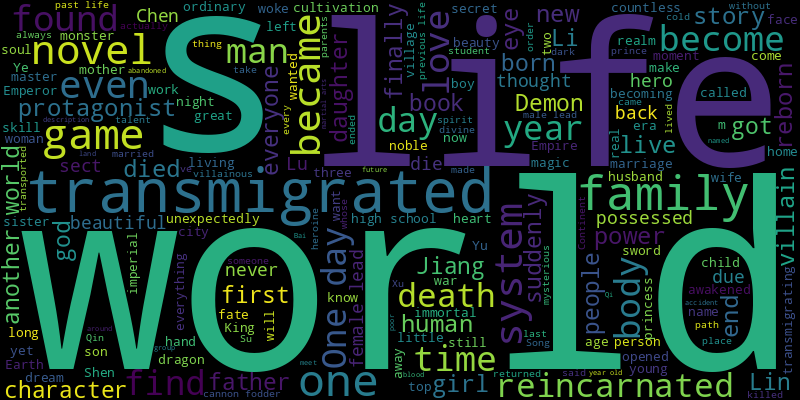

In [114]:
# wordcloud of descriptions for fun!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
text = ' '.join(data["Description"].dropna().tolist())
WordCloud(width=800, height=400).generate(text).to_image()